# MNIST digit classification
In this notebook we will take a look at a classic example of how neural networks can be employed to recognize hand written digits: the MNIST data set.
First, we will see how a classical neural network performs. Then we can build a hybdrid model, using quantum machine learning, and compare the results.

In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd

In [100]:
# first, import data set 
mnist_dataset = tf.keras.datasets.mnist                                 # import the data set
train_data, test_data = mnist_dataset.load_data()                       # save the training data and testing data from the set

# we can then separate the images and their labels (i.e the image of a 3 and its label 3)
train_images, train_labels = train_data
test_images, test_labels = test_data
print("Training images initial shape : ",train_images.shape)
print("Test images initial shape : ", test_images.shape)

Training images initial shape :  (60000, 28, 28)
Test images initial shape :  (10000, 28, 28)


As we can see from the dimension of the training images, there are $60000$ $28 \times 28$ pixels images. By following a common standard, we can reshape this variable as follows.

In [101]:
# we reshape the images so that we can feed the directly into the netwotrk using a first layer containing 784 neurons 
train_images_reshaped = train_images.reshape([train_images.shape[0], train_images.shape[1]*train_images.shape[2]])
print("Training images new shape : ",train_images_reshaped.shape)
test_images_reshaped = test_images.reshape([test_images.shape[0], test_images.shape[1]*test_images.shape[2]])
print("Test images new shape : ", test_images_reshaped.shape)


Training images new shape :  (60000, 784)
Test images new shape :  (10000, 784)


In [102]:
print("Train labels : ", train_labels, "Shape : ", train_labels.shape)
print("Test labels : ", test_labels,  " Shape : ", test_labels.shape)
train_labels_categorical = tf.keras.utils.to_categorical(train_labels)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels)
print("Train labels categorical : ", train_labels_categorical, "Shape : ", train_labels_categorical.shape)
print("Test labels categorical : ", test_labels_categorical, "Shape : ", test_labels_categorical.shape)

Train labels :  [5 0 4 ... 5 6 8] Shape :  (60000,)
Test labels :  [7 2 1 ... 4 5 6]  Shape :  (10000,)
Train labels categorical :  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] Shape :  (60000, 10)
Test labels categorical :  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] Shape :  (10000, 10)


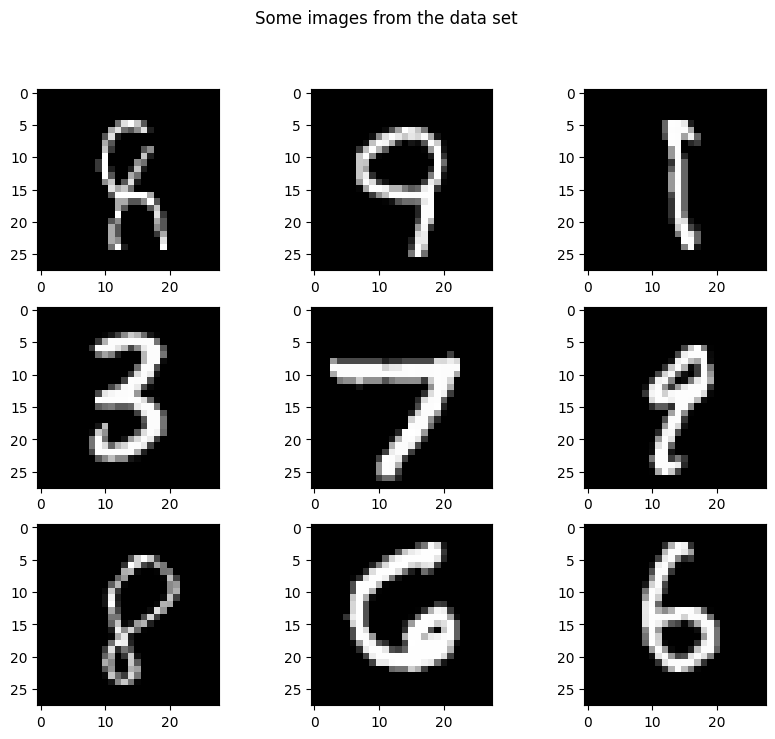

In [103]:
# plot some of the images in the data set 
index_list = []                                                     # list to save index of images plotted 
fig, ax = plt.subplots(3,3, figsize = [10,8])
fig.suptitle("Some images from the data set ")
for i in range(3):
    for j in range(3):
        random =  np.random.randint(low = 0, high = 1000)
        ax[i][j].imshow(test_images[(i+1)*random], cmap = "grey")
        index_list.append((i+1)*random)
    
plt.show()


In [104]:
# we will now define the network, in this case we use a sequential network with two fully connected layers

neural_netwotk = tf.keras.Sequential()
neural_netwotk.add(tf.keras.layers.Dense(512, activation = "relu", input_shape = [test_images.shape[1]*test_images.shape[2],]))
neural_netwotk.add(tf.keras.layers.Dense(10, activation = "softmax"))

print(neural_netwotk.summary())


/opt/miniconda3/envs/my_qiskit_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None


In [105]:
# we can now compile the model using adam optimizer and categorical cross entropy as a function 
neural_netwotk.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# we can then train the model using a batch of 256 images 
n_epochs = 10                                                           # number of times we repeat the training 
n_batches = 256

# model training
training = neural_netwotk.fit(train_images_reshaped, train_labels_categorical, epochs = n_epochs, batch_size = n_batches, validation_data = [test_images_reshaped, test_labels_categorical])

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8195 - loss: 16.5781 - val_accuracy: 0.9369 - val_loss: 1.4901
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9526 - loss: 0.9509 - val_accuracy: 0.9478 - val_loss: 1.0033
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9678 - loss: 0.4372 - val_accuracy: 0.9539 - val_loss: 0.7633
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9774 - loss: 0.2336 - val_accuracy: 0.9620 - val_loss: 0.5996
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9797 - loss: 0.2057 - val_accuracy: 0.9651 - val_loss: 0.5698
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9857 - loss: 0.1276 - val_accuracy: 0.9671 - val_loss: 0.5330
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9861 - loss: 0.1250 - val_accuracy: 0.9699 - val_loss: 0.4995
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9868 - loss: 0.1011 - val_accuracy: 0

In [106]:
# we can then see how the model performs on test data 
test_loss, test_accuracy = neural_netwotk.evaluate(test_images_reshaped, test_labels_categorical)
print("Test loss : ", test_loss)
print("Teste accuracy : ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.9590 - loss: 0.6838
Test loss :  0.551986813545227
Teste accuracy :  0.96670001745224


In [107]:
# save all the values stored during training
metrics = training.history
accuracy_over_training = metrics['accuracy']
loss_over_training = metrics['loss']
validation_accuracy_over_training = metrics['val_accuracy']
validation_loss_over_training = metrics['val_loss']
# display all the values usind a pd dataframe 
display_data = {
    "Accuracy " : accuracy_over_training,
    "Validation accuracy " : validation_accuracy_over_training,
    "Loss " : loss_over_training,
    "Validation loss " : loss_over_training
}

df = pd.DataFrame(display_data)
print(df)

   Accuracy   Validation accuracy      Loss   Validation loss 
0   0.895433                0.9369  6.316630          6.316630
1   0.954800                0.9478  0.852043          0.852043
2   0.969233                0.9539  0.415562          0.415562
3   0.977600                0.9620  0.243930          0.243930
4   0.979467                0.9651  0.210907          0.210907
5   0.985417                0.9671  0.130613          0.130613
6   0.985133                0.9699  0.137763          0.137763
7   0.986050                0.9668  0.116469          0.116469
8   0.986633                0.9622  0.116645          0.116645
9   0.986900                0.9667  0.128669          0.128669


Text(0, 0.5, 'Loss')

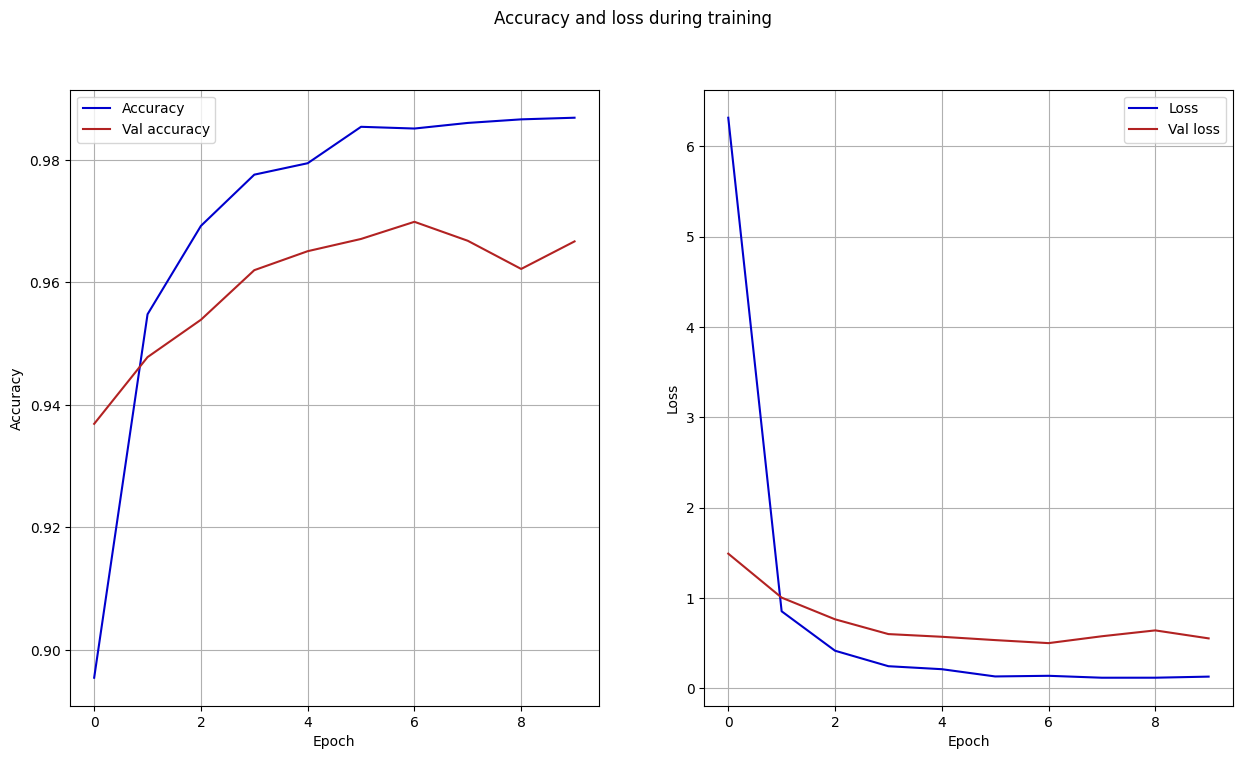

In [108]:
# plot the results 
iterations = np.arange(0, n_epochs, 1)
fig, ax = plt.subplots(1, 2, figsize = [15,8])
fig.suptitle('Accuracy and loss during training')
ax[0].plot(iterations, accuracy_over_training, c = 'mediumblue', label = 'Accuracy')
ax[0].plot(iterations, validation_accuracy_over_training, c = 'firebrick', label = 'Val accuracy')
ax[1].plot(iterations, loss_over_training, c = 'mediumblue', label = 'Loss')
ax[1].plot(iterations, validation_loss_over_training, c = 'firebrick', label = 'Val loss')
ax[0].legend(loc = 'best')
ax[0].grid()
ax[1].legend(loc = 'best')
ax[1].grid()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


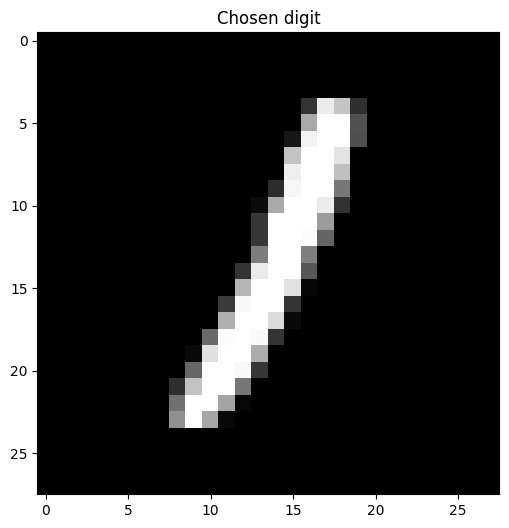

Digit predicted  1


In [117]:
# predictions 

digits_predicted = neural_netwotk.predict(test_images_reshaped)
index = np.random.randint(low = 0, high = 10000)
# we can now see what the model predicts 
plt.figure(figsize = [8,6])
plt.title("Chosen digit")
plt.imshow(test_images[index], cmap = "grey")
plt.show()
print("Digit predicted ", np.argmax(digits_predicted[index]))

In [129]:
# we can change the structure of the network and see how it performs 

neural_netwotk = tf.keras.Sequential()
neural_netwotk.add(tf.keras.layers.Dense(512, activation = "relu", input_shape = [test_images.shape[1]*test_images.shape[2],]))
neural_netwotk.add(tf.keras.layers.Dense(32, activation = "softmax"))
neural_netwotk.add(tf.keras.layers.Dense(10, activation = "softmax"))

print(neural_netwotk.summary())

/opt/miniconda3/envs/my_qiskit_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 418,666 (1.60 MB)

 Trainable params: 418,666 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [132]:
# we can now compile the model using adam optimizer and categorical cross entropy as a function 
neural_netwotk.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# we can then train the model using a batch of 256 images 
n_epochs = 50                                                           # number of times we repeat the training 
n_batches = 256

# model training
training = neural_netwotk.fit(train_images_reshaped, train_labels_categorical, epochs = n_epochs, batch_size = n_batches, validation_data = [test_images_reshaped, test_labels_categorical])

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4653 - loss: 1.2934 - val_accuracy: 0.4582 - val_loss: 1.2592
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4513 - loss: 1.2886 - val_accuracy: 0.4670 - val_loss: 1.2133
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4620 - loss: 1.2627 - val_accuracy: 0.4855 - val_loss: 1.1831
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4802 - loss: 1.2201 - val_accuracy: 0.4804 - val_loss: 1.1984
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4671 - loss: 1.2951 - val_accuracy: 0.4756 - val_loss: 1.1871
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4585 - loss: 1.2904 - val_accuracy: 0.4737 - val_loss: 1.1905
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4604 - loss: 1.3203 - val_accuracy: 0.4684 - val_loss: 1.2257
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4741 - loss: 1.2103 - val_accuracy: 0.

In [135]:
# save all the values stored during training
metrics = training.history
accuracy_over_training = metrics['accuracy']
loss_over_training = metrics['loss']
validation_accuracy_over_training = metrics['val_accuracy']
validation_loss_over_training = metrics['val_loss']
# display all the values usind a pd dataframe 
display_data = {
    "Accuracy " : accuracy_over_training,
    "Validation accuracy " : validation_accuracy_over_training,
    "Loss " : loss_over_training,
    "Validation loss " : loss_over_training
}

df = pd.DataFrame(display_data)
print(df)

    Accuracy   Validation accuracy      Loss   Validation loss 
0    0.467900                0.4582  1.276277          1.276277
1    0.460200                0.4670  1.266757          1.266757
2    0.459150                0.4855  1.284788          1.284788
3    0.480283                0.4804  1.223243          1.223243
4    0.467250                0.4756  1.279041          1.279041
5    0.461300                0.4737  1.276276          1.276276
6    0.459500                0.4684  1.345400          1.345400
7    0.471767                0.4401  1.213630          1.213630
8    0.457317                0.4617  1.260835          1.260835
9    0.474333                0.4644  1.217850          1.217850
10   0.474450                0.4720  1.190049          1.190049
11   0.463883                0.4647  1.225040          1.225040
12   0.470183                0.4706  1.182421          1.182421
13   0.470250                0.4808  1.240200          1.240200
14   0.467417                0.4809  1.1

Text(0, 0.5, 'Loss')

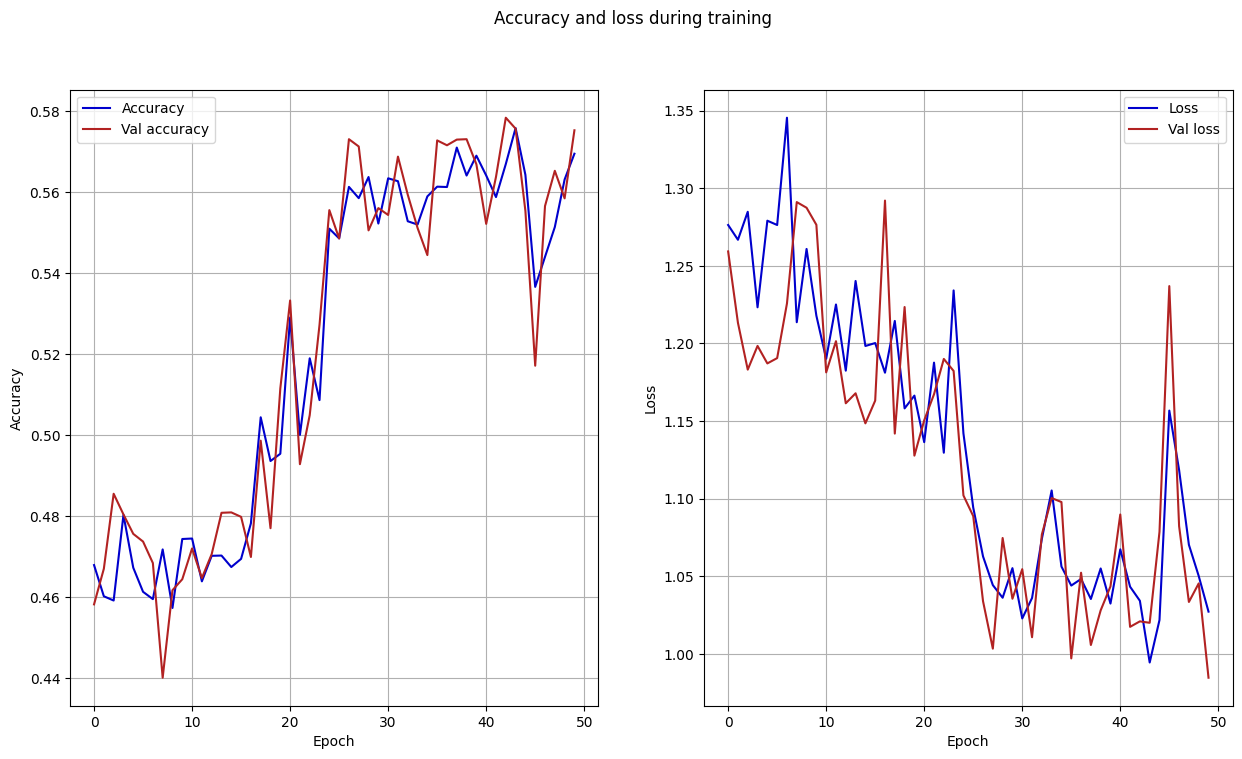

In [136]:
# plot the results 
iterations = np.arange(0, n_epochs, 1)
fig, ax = plt.subplots(1, 2, figsize = [15,8])
fig.suptitle('Accuracy and loss during training')
ax[0].plot(iterations, accuracy_over_training, c = 'mediumblue', label = 'Accuracy')
ax[0].plot(iterations, validation_accuracy_over_training, c = 'firebrick', label = 'Val accuracy')
ax[1].plot(iterations, loss_over_training, c = 'mediumblue', label = 'Loss')
ax[1].plot(iterations, validation_loss_over_training, c = 'firebrick', label = 'Val loss')
ax[0].legend(loc = 'best')
ax[0].grid()
ax[1].legend(loc = 'best')
ax[1].grid()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step


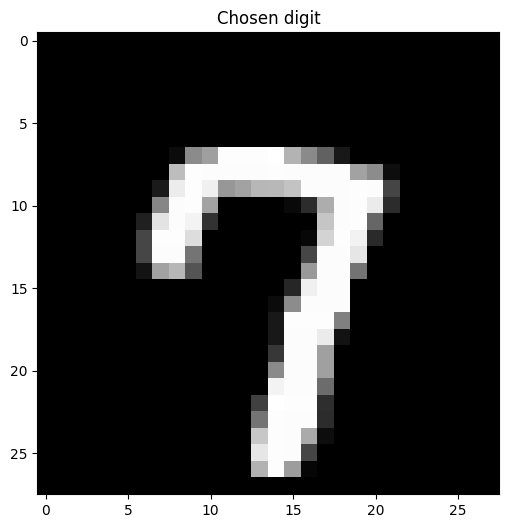

Digit predicted  7


In [138]:
# predictions 

digits_predicted = neural_netwotk.predict(test_images_reshaped)
index = np.random.randint(low = 0, high = 10000)
# we can now see what the model predicts 
plt.figure(figsize = [8,6])
plt.title("Chosen digit")
plt.imshow(test_images[index], cmap = "grey")
plt.show()
print("Digit predicted ", np.argmax(digits_predicted[index]))